# Crime_Project
* Major Cities Observations and Trends

In [74]:
from urllib.parse import urlencode, urlparse, parse_qsl
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = '{:,.2f}'.format

# Census & gmaps API Keys
from config import census_key, g_key

# Import my GoogleMap object with following methods:
        # extract_lat_lng(location)
        # search(keyword, radius = 1000, location=None)
        # detail(place_id, fields=["name", "rating", "formatted_phone_number", "formatted_address"])
from my_func import GoogleMapClient

In [91]:
def cities_coord(df):
    for row in df.itertuples():
        client = GoogleMapClient(api_key = g_key, address_or_postal_code = f'{row.City}')
        try: 
            df.loc[row.Index, 'Lat'] = client.lat
            df.loc[row.Index, 'Lng'] = client.lng
        except:
            pass
        if row.Index % 30 == 0: 
            print('Processing records: found ', row.Index,' cities')
    print('\nProcessing is over\n')
    return df

#### Import and Clean Murders datasets by 79 cities

In [93]:
# Reading and Cleaning DataSet for 79 major cities (Data Source: Data.org)
cities_murders = pd.read_csv('resources/murder_2015.csv', header=None)
cities_murders = cities_murders.rename(columns={0: 'City', 1: 'State', 2: '2014', 3: '2015', 4: '% Change'})
cities_murders = cities_murders.drop([0])
cities_murders[['2014', '2015', '% Change']] = cities_murders[['2014', '2015', '% Change']].astype(int)
cities_murders[['City', 'State']] = cities_murders[['City', 'State']].astype('str')
cities_murders = cities_murders.sort_values('2015', ascending=False).set_index('City')
cities_murders.head(10)

,State,2014,2015,% Change
City,,,,
Chicago,Illinois,411,478,67
New York,New York,333,352,19
Baltimore,Maryland,211,344,133
Houston,Texas,242,303,61
Detroit,Michigan,298,295,-3
Los Angeles,California,260,282,22
Philadelphia,Pennsylvania,248,280,32
St. Louis,Missouri,159,188,29
New Orleans,Louisiana,150,164,14


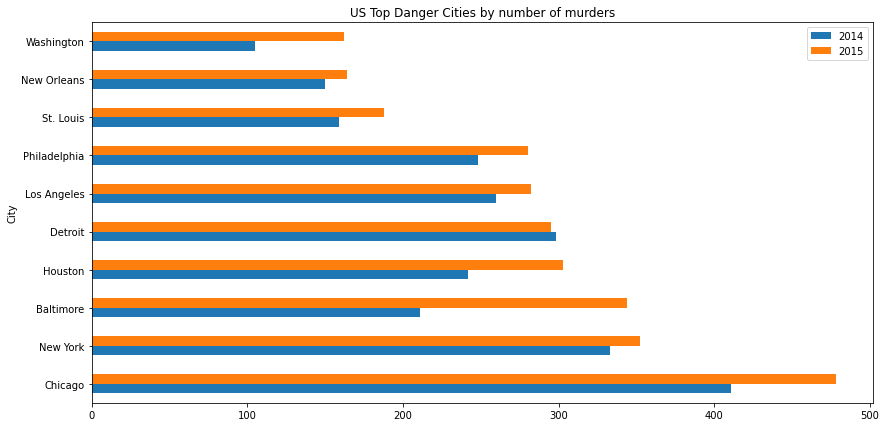

In [94]:
top_danger_cities = cities_murders.head(10).filter(['State', '2014', '2015'])
_= top_danger_cities.plot(kind='barh', title="US Top Danger Cities by number of murders", figsize=(14, 7))

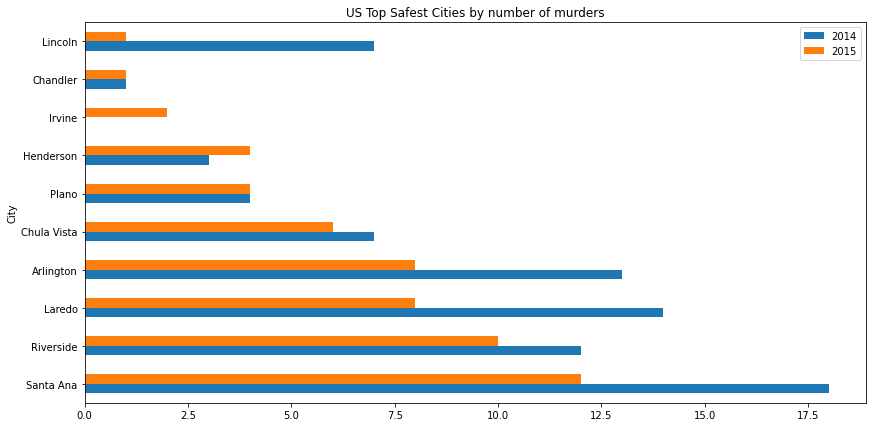

In [95]:
top_safest_cities = cities_murders.tail(10).filter(['State', '2014', '2015'])
_= top_safest_cities.plot(kind='barh', title="US Top Safest Cities by number of murders", figsize=(14, 7))

In [96]:
cities_murders = cities_murders.reset_index()
cities_murders = cities_coord(cities_murders)

Processing records: found  0  cities
Processing records: found  30  cities
Processing records: found  60  cities

Processing is over



In [97]:
cities_murders.to_csv("resources/cities_murders.csv", encoding="utf-8", index=False)
cities_murders.head()

,City,State,2014,2015,% Change,Lat,Lng
0,Chicago,Illinois,411,478,67,41.88,-87.63
1,New York,New York,333,352,19,40.71,-74.01
2,Baltimore,Maryland,211,344,133,39.29,-76.61
3,Houston,Texas,242,303,61,29.76,-95.37
4,Detroit,Michigan,298,295,-3,42.33,-83.05


In [61]:
# Reading and Cleaning DataSet for 79 cities (Data Source: Data.org) - preliminary data
cities_murders_2016 = pd.read_csv('resources/murder_2016_prelim.csv', header=None).filter([0,1,2,3,4])
cities_murders_2016 = cities_murders_2016.rename(columns={0: 'City', 1: 'State', 2: '2015', 3: '2016', 4: '% Change'})
cities_murders_2016 = cities_murders_2016.drop([0])
cities_murders_2016 = cities_murders_2016.sort_values('City', ascending=True)
cities_murders_2016[['2015', '2016', '% Change']] = cities_murders_2016[['2015', '2016', '% Change']].astype(int)
cities_murders_2016[['City', 'State']] = cities_murders_2016[['City', 'State']].astype('str')
cities_murders_2016 = cities_murders_2016.sort_values('2015', ascending=False)

#### Import and Clean List of major US cities over 50k population (788 cities)

In [ ]:
# Reading and Cleaning DataSet for 79 cities (Data Source: Data.org) - preliminary data
cities_murders_2016 = pd.read_csv('resources/murder_2016_prelim.csv', header=None).filter([0,1,2,3,4])
cities_murders_2016 = cities_murders_2016.rename(columns={0: 'City', 1: 'State', 2: '2015', 3: '2016', 4: '% Change'})
cities_murders_2016 = cities_murders_2016.drop([0])
cities_murders_2016 = cities_murders_2016.sort_values('City', ascending=True)
cities_murders_2016[['2015', '2016', '% Change']] = cities_murders_2016[['2015', '2016', '% Change']].astype(int)
cities_murders_2016[['City', 'State']] = cities_murders_2016[['City', 'State']].astype('category')
cities_murders_2016.sort_values('2015', ascending=False)

In [52]:
# Reading and Cleaning DataSet (Data Source: Census.org)
uscities_data = pd.read_excel('resources/uscities_over50k.xlsx', header=None) 
uscities_data.columns = uscities_data.iloc[1]
uscities_data.drop([0,1], axis=0, inplace=True)
uscities_data.set_index('Rank', inplace=True)
uscities_data = uscities_data.rename(columns={"Census": "Cens_2010",
                                      "Estimates Base": "Base_2010",
                                      2010.0: "2010", 2011.0: "2011",
                                      2012.0: "2012", 2013.0: "2013",
                                      2014.0: "2014", 2015.0: "2015",
                                      2016.0: "2016", 2017.0: "2017",
                                      2018.0: "2018", 2019.0: "2019"})
uscities_data.head()
for column in uscities_data.columns[3:]:
    uscities_data[column]= uscities_data[column].astype(float)

In [53]:
uscities_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 1 to 788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       788 non-null    object 
 1   Cens_2010  788 non-null    object 
 2   Base_2010  788 non-null    object 
 3   2010       788 non-null    float64
 4   2011       788 non-null    float64
 5   2012       788 non-null    float64
 6   2013       788 non-null    float64
 7   2014       788 non-null    float64
 8   2015       788 non-null    float64
 9   2016       788 non-null    float64
 10  2017       788 non-null    float64
 11  2018       788 non-null    float64
 12  2019       788 non-null    float64
dtypes: float64(10), object(3)
memory usage: 86.2+ KB


In [89]:
uscities_data = cities_coord(uscities_data)

Processing records: found  30  cities
Processing records: found  60  cities
Processing records: found  90  cities
Processing records: found  120  cities
Processing records: found  150  cities
Processing records: found  180  cities
Processing records: found  210  cities
Processing records: found  240  cities
Processing records: found  270  cities
Processing records: found  300  cities
Processing records: found  330  cities
Processing records: found  360  cities
Processing records: found  390  cities
Processing records: found  420  cities
Processing records: found  450  cities
Processing records: found  480  cities
Processing records: found  510  cities
Processing records: found  540  cities
Processing records: found  570  cities
Processing records: found  600  cities
Processing records: found  630  cities
Processing records: found  660  cities
Processing records: found  690  cities
Processing records: found  720  cities
Processing records: found  750  cities
Processing records: found  7

In [9]:
uscities_data.head()

1,City,Cens_2010,Base_2010,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Lat,Lng
Rank,,,,,,,,,,,,,,,
1,"New York city, New York",8175133,8175031,8190209,8272948,8346693,8396091,8433806,8463049,8469153,8437478,8390081,8336817,40.712775,-74.005973
2,"Los Angeles city, California",3792621,3793139,3795512,3820876,3851202,3881622,3909901,3938568,3963226,3975788,3977596,3979576,34.052234,-118.243685
3,"Chicago city, Illinois",2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,41.878114,-87.629798
4,"Houston city, Texas",2099451,2095517,2100280,2126032,2161593,2199391,2241826,2286908,2309544,2316750,2318573,2320268,29.760427,-95.369803
5,"Phoenix city, Arizona",1445632,1446691,1449038,1469796,1499274,1526491,1555445,1583690,1612199,1633560,1654675,1680992,33.448377,-112.074037


In [10]:
uscities_data.to_csv("resources/uscities_data.csv", encoding="utf-8", index=False)